In [ ]:
#Social_Network_Ads.csv

**Importing the libraries**

In [ ]:
import pandas as pd

**Importing the dataset**

In [ ]:
data=pd.read_csv('/content/Social_Network_Ads.csv')
data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
User ID,400.0,1.569154e+07,71658.321581,15566689.0,15626763.75,15694341.5,15750363.0,15815236.0
Age,400.0,3.765500e+01,10.482877,18.0,29.75,37.0,46.0,60.0
EstimatedSalary,400.0,6.974250e+04,34096.960282,15000.0,43000.00,70000.0,88000.0,150000.0
Purchased,400.0,3.575000e-01,0.479864,0.0,0.00,0.0,1.0,1.0


In [ ]:

data.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [ ]:
from sklearn import preprocessing 

data["Gender"]=data[["Gender"]].apply(preprocessing.LabelEncoder().fit_transform)

In [ ]:
data=data.drop(columns="User ID")
data

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0
...,...,...,...,...
395,0,46,41000,1
396,1,51,23000,1
397,0,50,20000,1
398,1,36,33000,0


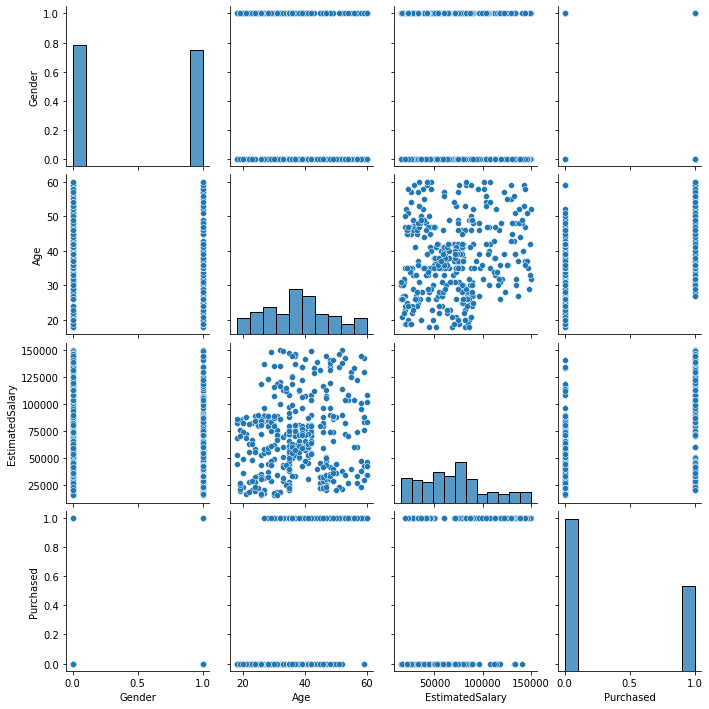

In [ ]:
import seaborn as sns
sns.pairplot(data)

In [ ]:
X=data.drop(columns="Purchased")
X

,Gender,Age,EstimatedSalary
0,1,19,19000
1,1,35,20000
2,0,26,43000
3,0,27,57000
4,1,19,76000
...,...,...,...
395,0,46,41000
396,1,51,23000
397,0,50,20000
398,1,36,33000


In [ ]:
Y=data["Purchased"]
Y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

**Splitting the dataset into the Training set and Test set**

In [ ]:
# Input Data
# X = features

# Output Data
# Y = Purchased


#from sklearn.cross_validation import train_test_split
#the submodule cross_validation is renamed and reprecated to model_selection
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size =0.2,random_state = 2)

print("xtrain shape : ", X_train.shape)
print("xtest shape : ", X_test.shape)
print("ytrain shape : ", Y_train.shape)
print("ytest shape : ", Y_test.shape)

xtrain shape :  (320, 3)
xtest shape :  (80, 3)
ytrain shape :  (320,)
ytest shape :  (80,)


**Feature Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler ## standrard scalig 
scaler = StandardScaler() #initialise to a variable
X_train_scaled = scaler.fit_transform(X_train) # fit (mean, sd) and then transform the training data
X_test_scaled = scaler.transform(X_test) # transform the test data

**Fitting Decision Tree Classification to the Training set**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Instantiate a DecisionTreeClassifier 'dt' with a maximum depth 
dt = DecisionTreeClassifier(max_depth=2)

# Fit dt to the training set
dt.fit(X_train, Y_train) # it will ask all possible questions, compute the information gain and choose the best split

DecisionTreeClassifier(max_depth=2)

**Predicting the Test set results**

In [ ]:
y_pred = dt.predict(X_test)
y_pred

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0])

**Making the Confusion Matrix**

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test, y_pred)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[44  4]
 [ 1 31]]


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.92      0.95        48
           1       0.89      0.97      0.93        32

    accuracy                           0.94        80
   macro avg       0.93      0.94      0.94        80
weighted avg       0.94      0.94      0.94        80



Test set accuracy: 0.94
Train set auc: 0.94


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


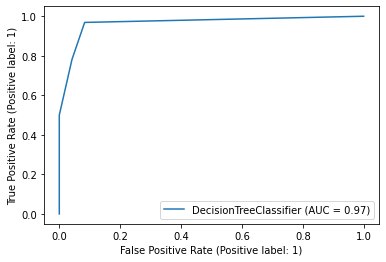

In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score, plot_roc_curve
#we compute the eval metric on test/validation set only primarily

# Predict test set labels
y_pred = dt.predict(X_test) 

# Compute test set accuracy
acc = accuracy_score(Y_test, y_pred)
print("Test set accuracy: {:.2f}".format(acc))
acc = roc_auc_score(Y_test, y_pred)
print("Train set auc: {:.2f}".format(acc))
plot_roc_curve(dt, X_test, Y_test)

**Visualising the Training set results**

[Text(0.5, 0.8333333333333334, 'X[1] <= 42.5\ngini = 0.453\nsamples = 320\nvalue = [209, 111]'),
 Text(0.25, 0.5, 'X[2] <= 89500.0\ngini = 0.265\nsamples = 229\nvalue = [193, 36]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.07\nsamples = 193\nvalue = [186, 7]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.313\nsamples = 36\nvalue = [7, 29]'),
 Text(0.75, 0.5, 'X[1] <= 46.5\ngini = 0.29\nsamples = 91\nvalue = [16, 75]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.469\nsamples = 16\nvalue = [6, 10]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.231\nsamples = 75\nvalue = [10, 65]')]

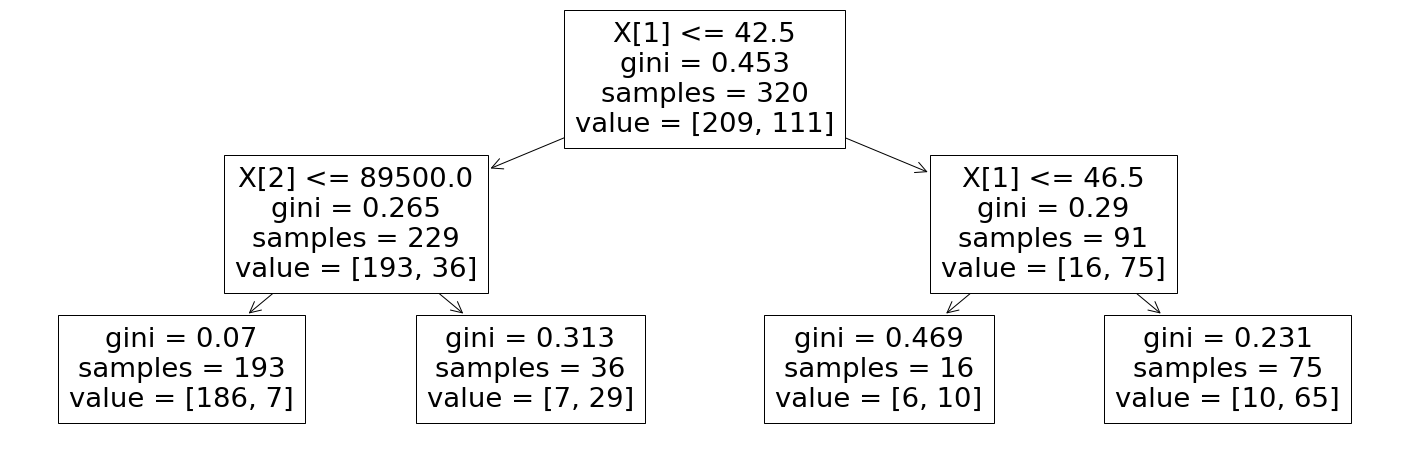

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(25,8))

from sklearn import tree

tree.plot_tree(dt.fit(X_train, Y_train))

In [ ]:
##there are 1 param to play with - max depth - to choose the best parameter, I will try different combinations and hoose the one which has the best accuracy/auc/any eval metric on cross-validation or test data-set
from sklearn.model_selection import cross_val_score
import numpy as np

for depth in [1,2,3,4,5,6,7,8,9,10,20,40,60]:
  dt = DecisionTreeClassifier(max_depth=depth) # will tell the DT to not grow past the given threhsold
  # Fit dt to the training set
  dt.fit(X_train, Y_train) # the model is trained
  trainAccuracy = accuracy_score(Y_train, dt.predict(X_train)) # this is useless information - i am showing to prove a point
  dt = DecisionTreeClassifier(max_depth=depth) # a fresh model which is not trained yet
  valAccuracy = cross_val_score(dt, X, Y, cv=10) # syntax : cross_val_Score(freshModel,fts, target, cv= 10/5)
  print(depth, trainAccuracy, np.mean(valAccuracy))

1 0.8375 0.825
2 0.90625 0.8949999999999999
3 0.90625 0.85
4 0.934375 0.8724999999999999
5 0.94375 0.8775000000000001
6 0.953125 0.8649999999999999
7 0.96875 0.86
8 0.978125 0.8550000000000001
9 0.984375 0.8425
10 0.990625 0.8474999999999999
20 1.0 0.8400000000000001
40 1.0 0.8400000000000001
60 1.0 0.845


**Visualising the Test set results**

[Text(0.5769230769230769, 0.9, 'X[1] <= 43.5\ngini = 0.48\nsamples = 80\nvalue = [48, 32]'),
 Text(0.3076923076923077, 0.7, 'X[2] <= 90500.0\ngini = 0.289\nsamples = 57\nvalue = [47, 10]'),
 Text(0.15384615384615385, 0.5, 'X[2] <= 76500.0\ngini = 0.043\nsamples = 46\nvalue = [45, 1]'),
 Text(0.07692307692307693, 0.3, 'gini = 0.0\nsamples = 35\nvalue = [35, 0]'),
 Text(0.23076923076923078, 0.3, 'X[2] <= 78500.0\ngini = 0.165\nsamples = 11\nvalue = [10, 1]'),
 Text(0.15384615384615385, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.3076923076923077, 0.1, 'gini = 0.0\nsamples = 10\nvalue = [10, 0]'),
 Text(0.46153846153846156, 0.5, 'X[1] <= 26.5\ngini = 0.298\nsamples = 11\nvalue = [2, 9]'),
 Text(0.38461538461538464, 0.3, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.5384615384615384, 0.3, 'X[1] <= 42.5\ngini = 0.18\nsamples = 10\nvalue = [1, 9]'),
 Text(0.46153846153846156, 0.1, 'gini = 0.0\nsamples = 9\nvalue = [0, 9]'),
 Text(0.6153846153846154, 0.1, 'gini = 0.0\nsampl

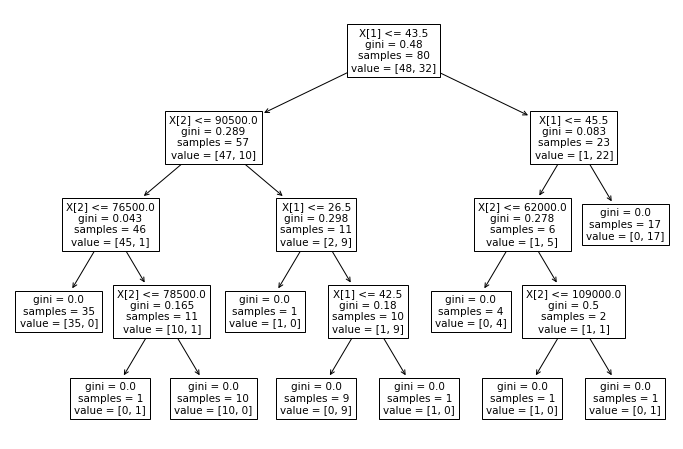

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(dt.fit(X_test, Y_test))

In [ ]:
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=0)


# fit the model
clf_en.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=0)

In [ ]:
y_pred_en = clf_en.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(Y_test, y_pred_en)))

Model accuracy score with criterion entropy: 0.9375


In [ ]:
y_pred_train_en = clf_en.predict(X_train)

y_pred_train_en

array([1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(Y_train, y_pred_train_en)))

Training-set accuracy score: 0.9062


In [ ]:
print('Training set score: {:.4f}'.format(clf_en.score(X_train, Y_train)))

print('Test set score: {:.4f}'.format(clf_en.score(X_test, Y_test)))

Training set score: 0.9062
Test set score: 0.9375


[Text(0.5, 0.8333333333333334, 'X[1] <= 43.5\nentropy = 0.971\nsamples = 80\nvalue = [48, 32]'),
 Text(0.25, 0.5, 'X[2] <= 90500.0\nentropy = 0.67\nsamples = 57\nvalue = [47, 10]'),
 Text(0.125, 0.16666666666666666, 'entropy = 0.151\nsamples = 46\nvalue = [45, 1]'),
 Text(0.375, 0.16666666666666666, 'entropy = 0.684\nsamples = 11\nvalue = [2, 9]'),
 Text(0.75, 0.5, 'X[1] <= 45.5\nentropy = 0.258\nsamples = 23\nvalue = [1, 22]'),
 Text(0.625, 0.16666666666666666, 'entropy = 0.65\nsamples = 6\nvalue = [1, 5]'),
 Text(0.875, 0.16666666666666666, 'entropy = 0.0\nsamples = 17\nvalue = [0, 17]')]

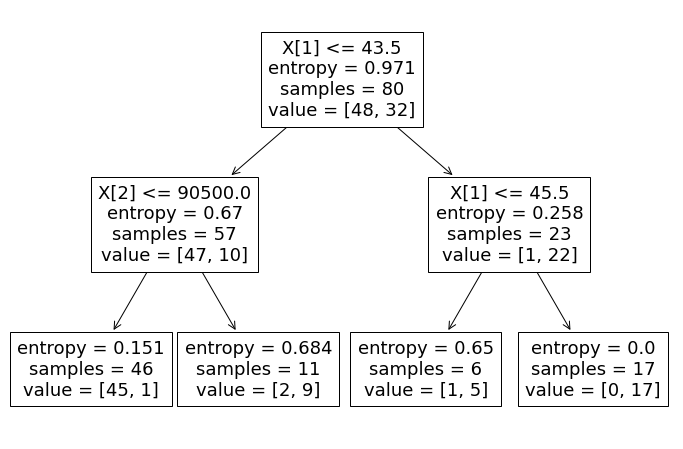

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_en.fit(X_test, Y_test))

[Text(0.5, 0.8333333333333334, 'X[1] <= 42.5\nentropy = 0.931\nsamples = 320\nvalue = [209, 111]'),
 Text(0.25, 0.5, 'X[2] <= 89500.0\nentropy = 0.628\nsamples = 229\nvalue = [193, 36]'),
 Text(0.125, 0.16666666666666666, 'entropy = 0.225\nsamples = 193\nvalue = [186, 7]'),
 Text(0.375, 0.16666666666666666, 'entropy = 0.711\nsamples = 36\nvalue = [7, 29]'),
 Text(0.75, 0.5, 'X[2] <= 38500.0\nentropy = 0.671\nsamples = 91\nvalue = [16, 75]'),
 Text(0.625, 0.16666666666666666, 'entropy = 0.229\nsamples = 27\nvalue = [1, 26]'),
 Text(0.875, 0.16666666666666666, 'entropy = 0.786\nsamples = 64\nvalue = [15, 49]')]

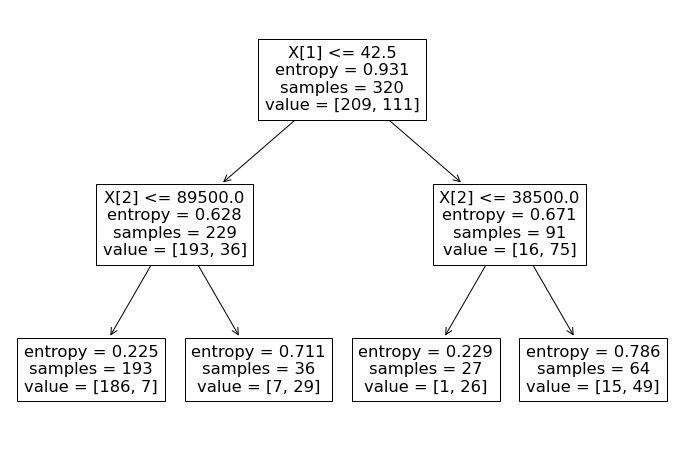

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_en.fit(X_train, Y_train))

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test, y_pred_en)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[44  4]
 [ 1 31]]


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, y_pred_en))

              precision    recall  f1-score   support

           0       0.98      0.92      0.95        48
           1       0.89      0.97      0.93        32

    accuracy                           0.94        80
   macro avg       0.93      0.94      0.94        80
weighted avg       0.94      0.94      0.94        80

